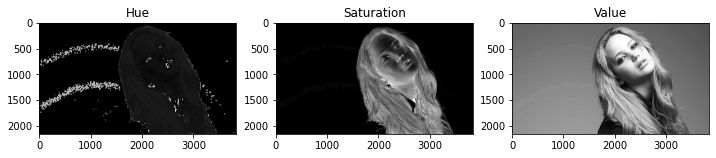

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('jeniffer.jpg')

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the image into Hue, Saturation, and Value planes
hue, saturation, value = cv2.split(hsv_image)

# Display the planes in grayscale
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(hue, cmap='gray')
plt.title('Hue')

plt.subplot(132)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation')

plt.subplot(133)
plt.imshow(value, cmap='gray')
plt.title('Value')

plt.show()

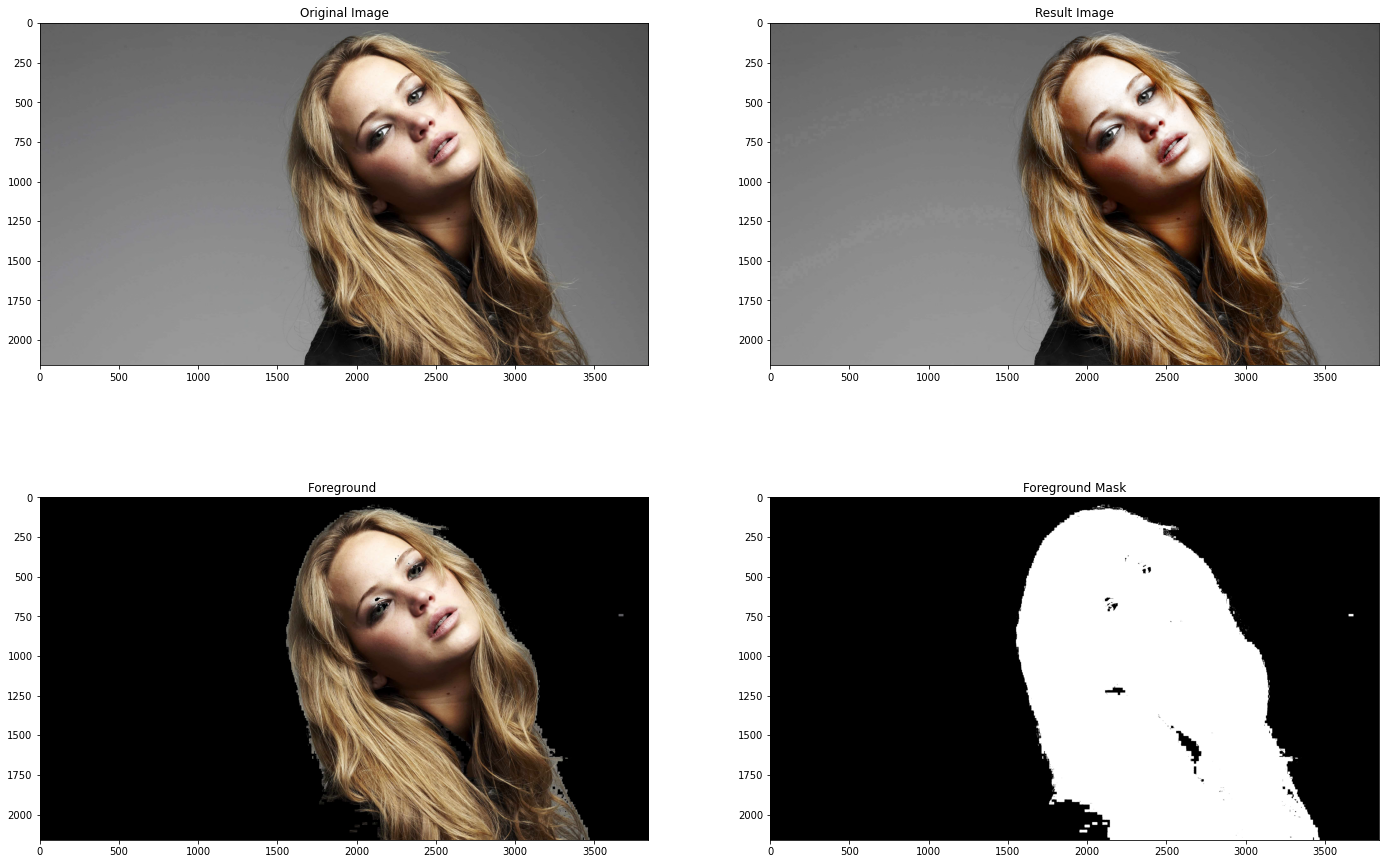

In [3]:
# Choose the Saturation (S) channel for thresholding
threshold_value = 12  
_, foreground_mask = cv2.threshold(saturation, threshold_value, 255, cv2.THRESH_BINARY)

foreground = cv2.bitwise_and(image, image, mask=foreground_mask)
hue_f, saturation_f, value_f = cv2.split(foreground)

# Calculate the number of pixels in the foreground mask
num_foreground_pixels = cv2.countNonZero(foreground_mask)

# Define a function for histogram equalization using cumulative sum and formula
def histogram_equalization(channel, mask):
    hist = cv2.calcHist([channel], [0], mask, [256], [0, 256])
    cdf = np.cumsum(hist)
    channel_masked = cv2.bitwise_and(channel, channel, mask=mask)
    equalized_channel = ((cdf[channel.flatten()]/cdf[-1]) * 255).astype(np.uint8)
    return equalized_channel.reshape(channel.shape)

#
# Apply histogram equalization to the Hue (H) channel for the foreground only
#equalized_hue = histogram_equalization(hue, foreground_mask)

# Apply histogram equalization to the Saturation (S) channel for the foreground only
equalized_saturation = histogram_equalization(saturation, foreground_mask)

# Apply histogram equalization to the Value (V) channel for the foreground only
#equalized_value = histogram_equalization(value, foreground_mask)

# Invert the foreground mask to obtain the background
background_mask = cv2.bitwise_not(foreground_mask)

# Create a black background image of the same size as the original image and same data type
background = np.zeros_like(image, dtype=np.uint8)

# Set the background pixels using the background mask
background[background_mask != 0] = 255

# Merge the original Hue and the equalized Saturation with the equalized Value channel
result_hsv_image = cv2.merge([hue, equalized_saturation, value])
#result_hsv_image = cv2.add(result_hsv_foreground, background_mask)

# Convert the result back to BGR color space
result_bgr_image = cv2.cvtColor(result_hsv_image, cv2.COLOR_HSV2BGR)

# Display the original image, foreground, and result using Matplotlib
plt.figure(figsize=(24, 16))

plt.subplot(221)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(222)
plt.imshow(cv2.cvtColor(result_bgr_image, cv2.COLOR_BGR2RGB))
plt.title('Result Image')

plt.subplot(223)
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
plt.title('Foreground ')

plt.subplot(224)
plt.imshow(cv2.cvtColor(foreground_mask, cv2.COLOR_GRAY2RGB))
plt.title('Foreground Mask')



plt.show()